# 단순선형회귀

독립변수($x$)의 변화에 따른 종속변수($y$)를 추론하는 통계.

하나의 독립변수와 하나의 종속변수가 주어진다.

가장 심플한 형태의 회귀분석

파이썬에서는 statemodels 패키지와 sklearn 패키지가 회귀분석 기능을 제공한다.

> sklearn은 머신러닝에 속하기 때문에 여기서는 statemodels만 살펴봄

## #01. 작업준비

### 패키지 참조

In [67]:
from pandas import read_excel
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

### 데이터 가져오기

자동차의 속도(speed)에 따른 제동거리(dist) 조사 데이터

In [68]:
df = read_excel("https://data.hossam.kr/E04/cars.xlsx")
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


## #02. 탐색적 데이터 분석

### 산점도 그래프

In [69]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

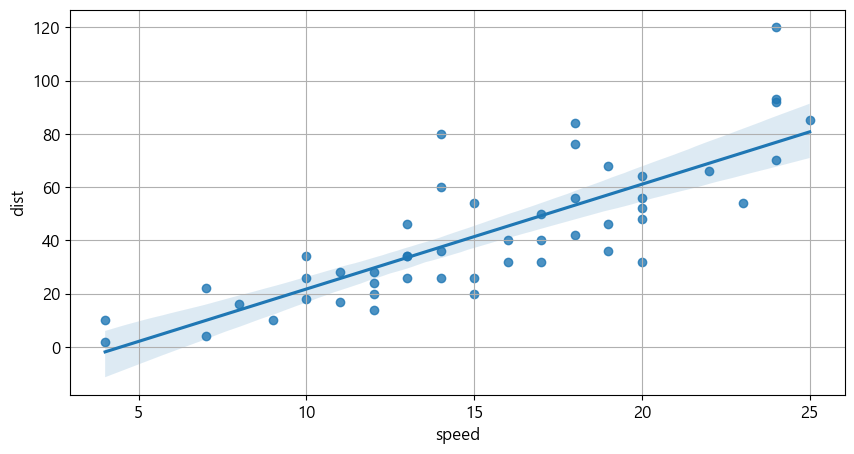

In [70]:
plt.rcParams['figure.figsize'] = (10, 5)
sb.regplot(data=df, x='speed', y='dist')
plt.grid()
plt.show()
plt.close()

## #03. 추론통계

### 1) 상관분석

In [71]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
speed vs dist,0.806895,1.489836e-12,True
dist vs speed,0.806895,1.489836e-12,True


> 상관분석 결과 p-value가 0.05보다 작으므로 속도와 제동거리 간의 양의 상관관계가 통계적으로 유의함을 할 수 있다.

### 2) 회귀분석

$y = ax + b$ 에 따라 `종속 ~ 독립` 형태로 표현식을 구성한다.

#### 분석을 위한 학습모델 구성

In [72]:
model = ols("dist ~ speed", data=df)
model

#### 분석 수행

In [73]:
fit = model.fit()
fit

#### 분석결과 확인

In [74]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.49e-12
Time:                        17:04:52   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 분석결과 해석

![result](res/result-all.png)

#### 모형적합도 해석

모형이 데이터에 잘 맞는 정도를 보여주는 지표

| 번호 | 이름 | 설명 |
|---|---|---|
| ① | R-squared | R제곱, 결정계수<br/>모형의 설명력을 의미<br/>dist 제동거리를 speed가 약 65% 설명한다. (각 사례마다 dist에 차이가 있다.) |
| ② | Adj. R-squared | 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정한 값.<br/>서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다.<br/>독립변수가 여러 개인 다중회귀분석에서 사용 |
| ③ | F-statistic | 회귀모형에 대한 (통계적) 유의미성 검증 결과 |
| ④ | Prob(F-statistic) | F-statistic에 대한 p-value. <br/>유의미함 (p < 0.05) |
| ⑤ | Log-Likelihood | 로그 우도: 종속변수가 정규분포라고 가정했을 때의 우도 |
| ⑥ | AIC, BIC | 로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다) |

#### 회귀계수(coef) 해석

| 번호 | 이름 | 설명 |
|---|---|---|
| ⑦ | 절편(Intercept) | speed가 0일 때 dist의 값 |
| ⑧ | 기울기 | 독립변수인 speed가 1 증가할 때마다 dist가 3.9324 증가한다는 것을 의미 |

##### 이를 수식으로 정리

$dist = ⑦ + ⑧ \times 독립변수$

즉, 

$dist = -17.5791 + 3.9324 \times speed$

#### p값

| 번호 | 이름 | 설명 |
|---|---|---|
| ⑨ | p값 | 모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률 |

이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미

보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 정리

> speed가 증가할 때 기대되는 dist의 변화는 유의수준 5%에서 통계적으로 유의하다.

## #04. 결과 보고

### 모형적합도 보고

F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

$F(⑩, ⑪) = ③, p \lt 0.05%$

#### 모형적합도 보고 예시

> dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다.
> 
> $(F(1,48) = 89.57, p < 0.05)$


### 독립변수에 대해 보고

$t(⑪) = ⑫, p < 0.05$


#### 독립변수 보고 예시

> speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다.
> 
> $(t(48) = 9.464, p < 0.05)$